In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter




<span style="color:#87cefa; font-size:150%">Target Heat flux Fitting Code</span> 

<span style="color:#87cefa; font-size:150%"> Mesh Code</span> 

(3, 38, 98)
(3, 38, 98)
[ 1.46925157 -1.29399156]
[-0.0715723  -0.07152744 -0.06704153 -0.06229474 -0.05731827 -0.05215115
 -0.04692141 -0.04169072 -0.03650874 -0.03143631 -0.02655407 -0.02190946
 -0.01750687 -0.01347613 -0.00982187 -0.00661739 -0.00386102 -0.00163475
  0.          0.00099463  0.00205597  0.00379204  0.00621517  0.00931366
  0.01314076  0.0176591   0.02284651  0.02871627  0.03528336  0.04247052
  0.0503574   0.05881249  0.06791765  0.07758154  0.08785052  0.09866668
  0.10996054  0.12180333]
[ 1.49532367 -1.39853962]


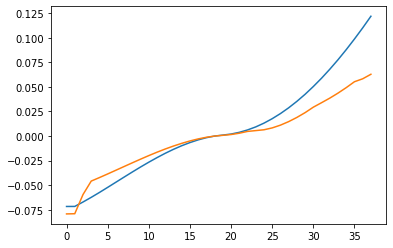

In [2]:
ny = 36
nx = 96
convmesh = np.load("./conv_geo_mesh_center.npy")
convmesh_x = np.load("./conv_geo_mesh_x.npy")
convmesh_y = np.load("./conv_geo_mesh_y.npy")

almesh = np.load("./al_geo_mesh_center.npy")
almesh_x = np.load("./al_geo_mesh_x.npy")
almesh_y = np.load("./al_geo_mesh_y.npy")
co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")
print(np.shape(co_facing))
print(np.shape(al_facing))
def conv_distance_center(first_point, second_point):
    x_range = x_convmeshinfo[first_point[1],first_point[0]]-x_convmeshinfo[second_point[1],second_point[0]]
    y_range = y_convmeshinfo[first_point[1],first_point[0]]-y_convmeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def conv_distance_point(first_point, second_point):
    x_range = convmesh_x[first_point[2],first_point[1],first_point[0]]-convmesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = convmesh_y[first_point[2],first_point[1],first_point[0]]-convmesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_almeshinfo[first_point[1],first_point[0]]-x_almeshinfo[second_point[1],second_point[0]]
    y_range = y_almeshinfo[first_point[1],first_point[0]]-y_almeshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = almesh_x[first_point[2],first_point[1],first_point[0]]-almesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = almesh_y[first_point[2],first_point[1],first_point[0]]-almesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

dumx_convmeshinfo = convmesh[:,0]
dumy_convmeshinfo = convmesh[:,1]
x_convmeshinfo = dumx_convmeshinfo.reshape(ny+2,nx+2)
y_convmeshinfo = dumy_convmeshinfo.reshape(ny+2,nx+2)

dumx_almeshinfo = almesh[:,0]
dumy_almeshinfo = almesh[:,1]
x_almeshinfo = dumx_almeshinfo.reshape(ny+2,nx+2)
y_almeshinfo = dumy_almeshinfo.reshape(ny+2,nx+2)



#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)

conv_sep_out_target = np.zeros(2)
conv_sep_out_target[0] = convmesh_x[1,18,96]
conv_sep_out_target[1] = convmesh_y[1,18,96]

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = almesh_x[1,18,96]
al_sep_out_target[1] = almesh_y[1,18,96]
convmesh_x_cen = np.sum(convmesh_x, axis = 0)/4
convmesh_y_cen = np.sum(convmesh_y, axis = 0)/4
almesh_x_cen = np.sum(almesh_x, axis = 0)/4
almesh_y_cen = np.sum(almesh_y, axis = 0)/4
print(conv_sep_out_target)
conv_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_target_dist[i] = conv_distance_point([96,i,1],[96,18,1])
    if i<18:
        conv_sep_out_target_dist[i] = -conv_sep_out_target_dist[i]
    
conv_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_target_dist[i] = conv_distance_point([1,i,1],[1,18,1])
    if i<18:
        conv_sep_in_target_dist[i] = -conv_sep_in_target_dist[i]
print(conv_sep_out_target_dist)

print(al_sep_out_target)
al_sep_out_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    if i<18:
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
    
al_sep_in_target_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([1,i,1],[1,18,1])
    if i<18:
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]


        
        
conv_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_out_midplane_dist[i] = conv_distance_point([51,i,1],[51,18,1])
    if i<18:
        conv_sep_out_midplane_dist[i] = -conv_sep_out_midplane_dist[i]
    
conv_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    conv_sep_in_midplane_dist[i] = conv_distance_point([29,i,1],[29,18,1])
    if i<18:
        conv_sep_in_midplane_dist[i] = -conv_sep_in_midplane_dist[i]


al_sep_out_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    if i<18:
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
    
al_sep_in_midplane_dist = np.zeros(ny+2)
for i in range(ny+2):
    al_sep_in_target_dist[i] = al_distance_point([29,i,1],[29,18,1])
    if i<18:
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        
        
        
        
plt.plot(conv_sep_out_target_dist)
plt.plot(al_sep_out_target_dist)

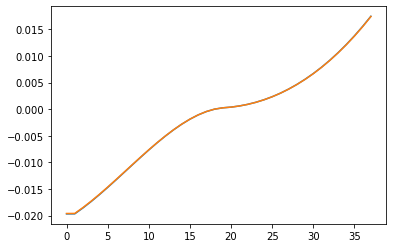

In [3]:
plt.plot(conv_sep_out_midplane_dist)
plt.plot(al_sep_out_midplane_dist)

<span style="color:#87cefa; font-size:150%">Ion Density</span> 

In [3]:
na_b2fstate_co_KSTAR_noNe = np.load("./na_b2fstate_co_KSTAR_noNe.npy")
na_b2fstate_co_ITER_noNe = np.load("./na_b2fstate_co_ITER_noNe.npy")
na_b2fstate_co_KDEMO_noNe = np.load("./na_b2fstate_co_KDEMO_noNe.npy")

na_b2fstate_al_KSTAR_noNe = np.load("./na_b2fstate_al_KSTAR_noNe.npy")
na_b2fstate_al_ITER_noNe = np.load("./na_b2fstate_al_ITER_noNe.npy")
na_b2fstate_al_KDEMO_noNe = np.load("./na_b2fstate_al_KDEMO_noNe.npy")


na_b2fstate_al_KSTAR_3e16Ne = np.load("./na_b2fstate_al_KSTAR_3e16Ne.npy")
na_b2fstate_al_ITER_3e16Ne = np.load("./na_b2fstate_al_ITER_3e16Ne.npy")
na_b2fstate_al_KDEMO_3e16Ne = np.load("./na_b2fstate_al_KDEMO_3e16Ne.npy")

na_b2fstate_co_KSTAR_3e16Ne = np.load("./na_b2fstate_co_KSTAR_3e16Ne.npy")
na_b2fstate_co_ITER_3e16Ne = np.load("./na_b2fstate_co_ITER_3e16Ne.npy")
na_b2fstate_co_KDEMO_3e16Ne = np.load("./na_b2fstate_co_KDEMO_3e16Ne.npy")

#na_b2fstate_co_KSTAR_3e18Ne = np.load("./na_b2fstate_co_KSTAR_3e18Ne.npy")
#na_b2fstate_co_IITER_3e18Ne = np.load("./na_b2fstate_co_ITER_3e18Ne.npy")
#na_b2fstate_co_KDEMO_3e18Ne = np.load("./na_b2fstate_co_KDEMO_3e18Ne.npy")

na_b2fstate_al_KSTAR_3e18Ne = np.load("./na_b2fstate_al_KSTAR_3e18Ne.npy")
na_b2fstate_al_ITER_3e18Ne = np.load("./na_b2fstate_al_ITER_3e18Ne.npy")
na_b2fstate_al_KDEMO_3e18Ne = np.load("./na_b2fstate_al_KDEMO_3e18Ne.npy")

na_b2fstate_co_KSTAR_3e19Ne = np.load("./na_b2fstate_co_KSTAR_3e19Ne.npy")
na_b2fstate_co_ITER_3e19Ne = np.load("./na_b2fstate_co_ITER_3e19Ne.npy")
na_b2fstate_co_KDEMO_3e19Ne = np.load("./na_b2fstate_co_KDEMO_3e19Ne.npy")

na_b2fstate_al_KSTAR_3e19Ne = np.load("./na_b2fstate_al_KSTAR_3e19Ne.npy")
na_b2fstate_al_ITER_3e19Ne = np.load("./na_b2fstate_al_ITER_3e19Ne.npy")
na_b2fstate_al_KDEMO_3e19Ne = np.load("./na_b2fstate_al_KDEMO_3e19Ne.npy")

<span style="color:#87cefa; font-size:150%">Electron Density</span> 

In [4]:
ne_b2fstate_co_KSTAR_noNe = np.load("./ne_b2fstate_co_KSTAR_noNe.npy")
ne_b2fstate_co_ITER_noNe = np.load("./ne_b2fstate_co_ITER_noNe.npy")
ne_b2fstate_co_KDEMO_noNe = np.load("./ne_b2fstate_co_KDEMO_noNe.npy")

ne_b2fstate_al_KSTAR_noNe = np.load("./ne_b2fstate_al_KSTAR_noNe.npy")
ne_b2fstate_al_ITER_noNe = np.load("./ne_b2fstate_al_ITER_noNe.npy")
ne_b2fstate_al_KDEMO_noNe = np.load("./ne_b2fstate_al_KDEMO_noNe.npy")


ne_b2fstate_al_KSTAR_3e16Ne = np.load("./ne_b2fstate_al_KSTAR_3e16Ne.npy")
ne_b2fstate_al_ITER_3e16Ne = np.load("./ne_b2fstate_al_ITER_3e16Ne.npy")
ne_b2fstate_al_KDEMO_3e16Ne = np.load("./ne_b2fstate_al_KDEMO_3e16Ne.npy")

ne_b2fstate_co_KSTAR_3e16Ne = np.load("./ne_b2fstate_co_KSTAR_3e16Ne.npy")
ne_b2fstate_co_ITER_3e16Ne = np.load("./ne_b2fstate_co_ITER_3e16Ne.npy")
ne_b2fstate_co_KDEMO_3e16Ne = np.load("./ne_b2fstate_co_KDEMO_3e16Ne.npy")

#ne_b2fstate_co_KSTAR_3e18Ne = np.load("./ne_b2fstate_co_KSTAR_3e18Ne.npy")
#ne_b2fstate_co_IITER_3e18Ne = np.load("./ne_b2fstate_co_ITER_3e18Ne.npy")
#ne_b2fstate_co_KDEMO_3e18Ne = np.load("./ne_b2fstate_co_KDEMO_3e18Ne.npy")

ne_b2fstate_al_KSTAR_3e18Ne = np.load("./ne_b2fstate_al_KSTAR_3e18Ne.npy")
ne_b2fstate_al_ITER_3e18Ne = np.load("./ne_b2fstate_al_ITER_3e18Ne.npy")
ne_b2fstate_al_KDEMO_3e18Ne = np.load("./ne_b2fstate_al_KDEMO_3e18Ne.npy")

ne_b2fstate_co_KSTAR_3e19Ne = np.load("./ne_b2fstate_co_KSTAR_3e19Ne.npy")
ne_b2fstate_co_ITER_3e19Ne = np.load("./ne_b2fstate_co_ITER_3e19Ne.npy")
ne_b2fstate_co_KDEMO_3e19Ne = np.load("./ne_b2fstate_co_KDEMO_3e19Ne.npy")

ne_b2fstate_al_KSTAR_3e19Ne = np.load("./ne_b2fstate_al_KSTAR_3e19Ne.npy")
ne_b2fstate_al_ITER_3e19Ne = np.load("./ne_b2fstate_al_ITER_3e19Ne.npy")
ne_b2fstate_al_KDEMO_3e19Ne = np.load("./ne_b2fstate_al_KDEMO_3e19Ne.npy")

<span style="color:#87cefa; font-size:150%">Electron Temperature</span> 

In [6]:
eV = 1.602176634*(10**(-19))
te_b2fstate_co_KSTAR_noNe   = np.load("./te_b2fstate_co_KSTAR_noNe.npy")/eV
te_b2fstate_co_ITER_noNe    = np.load("./te_b2fstate_co_ITER_noNe.npy")/eV
te_b2fstate_co_KDEMO_noNe   = np.load("./te_b2fstate_co_KDEMO_noNe.npy")/eV

te_b2fstate_al_KSTAR_noNe   = np.load("./te_b2fstate_al_KSTAR_noNe.npy")/eV
te_b2fstate_al_ITER_noNe    = np.load("./te_b2fstate_al_ITER_noNe.npy")/eV
te_b2fstate_al_KDEMO_noNe   = np.load("./te_b2fstate_al_KDEMO_noNe.npy")/eV

te_b2fstate_al_KSTAR_3e16Ne = np.load("./te_b2fstate_al_KSTAR_3e16Ne.npy")/eV
te_b2fstate_al_ITER_3e16Ne  = np.load("./te_b2fstate_al_ITER_3e16Ne.npy")/eV
te_b2fstate_al_KDEMO_3e16Ne = np.load("./te_b2fstate_al_KDEMO_3e16Ne.npy")/eV

te_b2fstate_co_KSTAR_3e16Ne = np.load("./te_b2fstate_co_KSTAR_3e16Ne.npy")/eV
te_b2fstate_co_ITER_3e16Ne  = np.load("./te_b2fstate_co_ITER_3e16Ne.npy")/eV
te_b2fstate_co_KDEMO_3e16Ne = np.load("./te_b2fstate_co_KDEMO_3e16Ne.npy")/eV

#te_b2fstate_co_KSTAR_3e18Ne = np.load("./ne_b2fstate_co_KSTAR_3e18Ne.npy")
#te_b2fstate_co_IITER_3e18Ne = np.load("./ne_b2fstate_co_ITER_3e18Ne.npy")
#te_b2fstate_co_KDEMO_3e18Ne = np.load("./ne_b2fstate_co_KDEMO_3e18Ne.npy")

#te_b2fstate_al_KSTAR_3e18Ne = np.load("./te_b2fstate_al_KSTAR_3e18Ne.npy")
#te_b2fstate_al_ITER_3e18Ne  = np.load("./te_b2fstate_al_ITER_3e18Ne.npy")
#te_b2fstate_al_KDEMO_3e18Ne = np.load("./te_b2fstate_al_KDEMO_3e18Ne.npy")

te_b2fstate_co_KSTAR_3e19Ne = np.load("./te_b2fstate_co_KSTAR_3e19Ne.npy")/eV
te_b2fstate_co_ITER_3e19Ne  = np.load("./te_b2fstate_co_ITER_3e19Ne.npy")/eV
te_b2fstate_co_KDEMO_3e19Ne = np.load("./te_b2fstate_co_KDEMO_3e19Ne.npy")/eV

te_b2fstate_al_KSTAR_3e19Ne = np.load("./te_b2fstate_al_KSTAR_3e19Ne.npy")/eV
te_b2fstate_al_ITER_3e19Ne  = np.load("./te_b2fstate_al_ITER_3e19Ne.npy")/eV
te_b2fstate_al_KDEMO_3e19Ne = np.load("./te_b2fstate_al_KDEMO_3e19Ne.npy")/eV

<span style="color:#87cefa; font-size:150%"> Electron Heat flux</span> 

In [7]:
fhe_b2fstate_co_KSTAR_noNe = np.load("./fhe_b2fstate_co_KSTAR_noNe.npy")
fhe_b2fstate_co_ITER_noNe = np.load("./fhe_b2fstate_co_ITER_noNe.npy")
fhe_b2fstate_co_KDEMO_noNe = np.load("./fhe_b2fstate_co_KDEMO_noNe.npy")

fhe_b2fstate_al_KSTAR_noNe = np.load("./fhe_b2fstate_al_KSTAR_noNe.npy")
fhe_b2fstate_al_ITER_noNe = np.load("./fhe_b2fstate_al_ITER_noNe.npy")
fhe_b2fstate_al_KDEMO_noNe = np.load("./fhe_b2fstate_al_KDEMO_noNe.npy")

fhe_b2fstate_co_KSTAR_3e16Ne = np.load("./fhe_b2fstate_co_KSTAR.npy")
fhe_b2fstate_co_ITER_3e16Ne = np.load("./fhe_b2fstate_co_ITER.npy")
fhe_b2fstate_co_KDEMO_3e16Ne = np.load("./fhe_b2fstate_co_KDEMO.npy")

fhe_b2fstate_al_KSTAR_3e16Ne = np.load("./fhe_b2fstate_al_KSTAR.npy")
fhe_b2fstate_al_ITER_3e16Ne = np.load("./fhe_b2fstate_al_ITER.npy")
fhe_b2fstate_al_KDEMO_3e16Ne = np.load("./fhe_b2fstate_al_KDEMO.npy")

#fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./fhe_b2fstate_co_KSTAR_3e19Ne.npy")
#fhe_b2fstate_co_ITER_3e19Ne = np.load("./fhe_b2fstate_co_ITER_3e19Ne.npy")
#fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./fhe_b2fstate_co_KDEMO_3e19Ne.npy")

fhe_b2fstate_al_KSTAR_3e18Ne = np.load("./fhe_b2fstate_al_KSTAR_3e18Ne.npy")
fhe_b2fstate_al_ITER_3e18Ne = np.load("./fhe_b2fstate_al_ITER_3e18Ne.npy")
fhe_b2fstate_al_KDEMO_3e18Ne = np.load("./fhe_b2fstate_al_KDEMO_3e18Ne.npy")




fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./fhe_b2fstate_co_KSTAR_3e19Ne.npy")
fhe_b2fstate_co_ITER_3e19Ne = np.load("./fhe_b2fstate_co_ITER_3e19Ne.npy")
fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./fhe_b2fstate_co_KDEMO_3e19Ne.npy")

fhe_b2fstate_al_KSTAR_3e19Ne = np.load("./fhe_b2fstate_al_KSTAR_3e19Ne.npy")
fhe_b2fstate_al_ITER_3e19Ne = np.load("./fhe_b2fstate_al_ITER_3e19Ne.npy")
fhe_b2fstate_al_KDEMO_3e19Ne = np.load("./fhe_b2fstate_al_KDEMO_3e19Ne.npy")


fhe_b2fstate_co_KSTAR_3e16ws3 = np.load("./fhe_b2fstate_co_KSTAR_3e16ws3.npy")

In [57]:
#fhi_b2fplasmf_co_KSTAR_noNe = np.load("./fhi_b2fplasmf_co_KSTAR_noNe.npy")
#fhi_b2fplasmf_co_ITER_noNe  = np.load("./fhi_b2fplasmf_co_ITER_noNe.npy")
#fhi_b2fplasmf_co_KDEMO_noNe = np.load("./fhi_b2fplasmf_co_KDEMO_noNe.npy")

#fhi_b2fplasmf_al_KSTAR_noNe = np.load("./fhi_b2fplasmf_al_KSTAR_noNe.npy")
#fhi_b2fplasmf_al_ITER_noNe  = np.load("./fhi_b2fplasmf_al_ITER_noNe.npy")
#fhi_b2fplasmf_al_KDEMO_noNe = np.load("./fhi_b2fplasmf_al_KDEMO_noNe.npy")

fhe_b2fplasmf_co_KSTAR_3e16Ne = np.load("./fhe_b2fplasmf_co_KSTAR_3e16Ne.npy")
fhe_b2fplasmf_co_ITER_3e16Ne  = np.load("./fhe_b2fplasmf_co_ITER_3e16Ne.npy")
fhe_b2fplasmf_co_KDEMO_3e16Ne = np.load("./fhe_b2fplasmf_co_KDEMO_3e16Ne.npy")

fhe_b2fplasmf_al_KSTAR_3e16Ne = np.load("./fhe_b2fplasmf_al_KSTAR_3e16Ne.npy")
fhe_b2fplasmf_al_ITER_3e16Ne  = np.load("./fhe_b2fplasmf_al_ITER_3e16Ne.npy")
fhe_b2fplasmf_al_KDEMO_3e16Ne = np.load("./fhe_b2fplasmf_al_KDEMO_3e16Ne.npy")

#fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./fhe_b2fstate_co_KSTAR_3e19Ne.npy")
#fhe_b2fstate_co_ITER_3e19Ne = np.load("./fhe_b2fstate_co_ITER_3e19Ne.npy")
#fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./fhe_b2fstate_co_KDEMO_3e19Ne.npy")

#fhi_b2fplasmf_al_KSTAR_3e18Ne = np.load("./fhi_b2fplasmf_al_KSTAR_3e18Ne.npy")
#fhi_b2fplasmf_al_ITER_3e18Ne  = np.load("./fhi_b2fplasmf_al_ITER_3e18Ne.npy")
#fhi_b2fplasmf_al_KDEMO_3e18Ne = np.load("./fhi_b2fplasmf_al_KDEMO_3e18Ne.npy")


#fhi_b2fplasmf_co_KSTAR_3e19Ne = np.load("./fhi_b2fplasmf_co_KSTAR_3e19Ne.npy")
#fhi_b2fplasmf_co_ITER_3e19Ne  = np.load("./fhi_b2fplasmf_co_ITER_3e19Ne.npy")
#fhi_b2fplasmf_co_KDEMO_3e19Ne = np.load("./fhi_b2fplasmf_co_KDEMO_3e19Ne.npy")


#fhi_b2fplasmf_al_KSTAR_3e19Ne = np.load("./fhi_b2fplasmf_al_KSTAR_3e19Ne.npy")
#fhi_b2fplasmf_al_ITER_3e19Ne  = np.load("./fhi_b2fplasmf_al_ITER_3e19Ne.npy")
#fhi_b2fplasmf_al_KDEMO_3e19Ne = np.load("./fhi_b2fplasmf_al_KDEMO_3e19Ne.npy")

<span style="color:#87cefa; font-size:150%"> Ion Flux</span> 

In [8]:
fhi_b2fstate_co_KSTAR_noNe = np.load("./fhi_b2fstate_co_KSTAR_noNe.npy")
fhi_b2fstate_co_ITER_noNe = np.load("./fhi_b2fstate_co_ITER_noNe.npy")
fhi_b2fstate_co_KDEMO_noNe = np.load("./fhi_b2fstate_co_KDEMO_noNe.npy")

fhi_b2fstate_al_KSTAR_noNe = np.load("./fhi_b2fstate_al_KSTAR_noNe.npy")
fhi_b2fstate_al_ITER_noNe = np.load("./fhi_b2fstate_al_ITER_noNe.npy")
fhi_b2fstate_al_KDEMO_noNe = np.load("./fhi_b2fstate_al_KDEMO_noNe.npy")

fhi_b2fstate_co_KSTAR_3e16Ne = np.load("./fhi_b2fstate_co_KSTAR.npy")
fhi_b2fstate_co_ITER_3e16Ne = np.load("./fhi_b2fstate_co_ITER.npy")
fhi_b2fstate_co_KDEMO_3e16Ne = np.load("./fhi_b2fstate_co_KDEMO.npy")

fhi_b2fstate_al_KSTAR_3e16Ne = np.load("./fhi_b2fstate_al_KSTAR.npy")
fhi_b2fstate_al_ITER_3e16Ne = np.load("./fhi_b2fstate_al_ITER.npy")
fhi_b2fstate_al_KDEMO_3e16Ne = np.load("./fhi_b2fstate_al_KDEMO.npy")

#fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./fhe_b2fstate_co_KSTAR_3e19Ne.npy")
#fhe_b2fstate_co_ITER_3e19Ne = np.load("./fhe_b2fstate_co_ITER_3e19Ne.npy")
#fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./fhe_b2fstate_co_KDEMO_3e19Ne.npy")

fhi_b2fstate_al_KSTAR_3e18Ne = np.load("./fhi_b2fstate_al_KSTAR_3e18Ne.npy")
fhi_b2fstate_al_ITER_3e18Ne = np.load("./fhi_b2fstate_al_ITER_3e18Ne.npy")
fhi_b2fstate_al_KDEMO_3e18Ne = np.load("./fhi_b2fstate_al_KDEMO_3e18Ne.npy")




fhi_b2fstate_co_KSTAR_3e19Ne = np.load("./fhi_b2fstate_co_KSTAR_3e19Ne.npy")
fhi_b2fstate_co_ITER_3e19Ne = np.load("./fhi_b2fstate_co_ITER_3e19Ne.npy")
fhi_b2fstate_co_KDEMO_3e19Ne = np.load("./fhi_b2fstate_co_KDEMO_3e19Ne.npy")


fhi_b2fstate_al_KSTAR_3e19Ne = np.load("./fhi_b2fstate_al_KSTAR_3e19Ne.npy")
fhi_b2fstate_al_ITER_3e19Ne = np.load("./fhi_b2fstate_al_ITER_3e19Ne.npy")
fhi_b2fstate_al_KDEMO_3e19Ne = np.load("./fhi_b2fstate_al_KDEMO_3e19Ne.npy")

In [52]:
#fhi_b2fplasmf_co_KSTAR_noNe = np.load("./fhi_b2fplasmf_co_KSTAR_noNe.npy")
#fhi_b2fplasmf_co_ITER_noNe  = np.load("./fhi_b2fplasmf_co_ITER_noNe.npy")
#fhi_b2fplasmf_co_KDEMO_noNe = np.load("./fhi_b2fplasmf_co_KDEMO_noNe.npy")

#fhi_b2fplasmf_al_KSTAR_noNe = np.load("./fhi_b2fplasmf_al_KSTAR_noNe.npy")
#fhi_b2fplasmf_al_ITER_noNe  = np.load("./fhi_b2fplasmf_al_ITER_noNe.npy")
#fhi_b2fplasmf_al_KDEMO_noNe = np.load("./fhi_b2fplasmf_al_KDEMO_noNe.npy")

fhi_b2fplasmf_co_KSTAR_3e16Ne = np.load("./fhi_b2fplasmf_co_KSTAR_3e16Ne.npy")
fhi_b2fplasmf_co_ITER_3e16Ne  = np.load("./fhi_b2fplasmf_co_ITER_3e16Ne.npy")
fhi_b2fplasmf_co_KDEMO_3e16Ne = np.load("./fhi_b2fplasmf_co_KDEMO_3e16Ne.npy")

fhi_b2fplasmf_al_KSTAR_3e16Ne = np.load("./fhi_b2fplasmf_al_KSTAR_3e16Ne.npy")
fhi_b2fplasmf_al_ITER_3e16Ne  = np.load("./fhi_b2fplasmf_al_ITER_3e16Ne.npy")
fhi_b2fplasmf_al_KDEMO_3e16Ne = np.load("./fhi_b2fplasmf_al_KDEMO_3e16Ne.npy")

#fhe_b2fstate_co_KSTAR_3e19Ne = np.load("./fhe_b2fstate_co_KSTAR_3e19Ne.npy")
#fhe_b2fstate_co_ITER_3e19Ne = np.load("./fhe_b2fstate_co_ITER_3e19Ne.npy")
#fhe_b2fstate_co_KDEMO_3e19Ne = np.load("./fhe_b2fstate_co_KDEMO_3e19Ne.npy")

#fhi_b2fplasmf_al_KSTAR_3e18Ne = np.load("./fhi_b2fplasmf_al_KSTAR_3e18Ne.npy")
#fhi_b2fplasmf_al_ITER_3e18Ne  = np.load("./fhi_b2fplasmf_al_ITER_3e18Ne.npy")
#fhi_b2fplasmf_al_KDEMO_3e18Ne = np.load("./fhi_b2fplasmf_al_KDEMO_3e18Ne.npy")


#fhi_b2fplasmf_co_KSTAR_3e19Ne = np.load("./fhi_b2fplasmf_co_KSTAR_3e19Ne.npy")
#fhi_b2fplasmf_co_ITER_3e19Ne  = np.load("./fhi_b2fplasmf_co_ITER_3e19Ne.npy")
#fhi_b2fplasmf_co_KDEMO_3e19Ne = np.load("./fhi_b2fplasmf_co_KDEMO_3e19Ne.npy")


#fhi_b2fplasmf_al_KSTAR_3e19Ne = np.load("./fhi_b2fplasmf_al_KSTAR_3e19Ne.npy")
#fhi_b2fplasmf_al_ITER_3e19Ne  = np.load("./fhi_b2fplasmf_al_ITER_3e19Ne.npy")
#fhi_b2fplasmf_al_KDEMO_3e19Ne = np.load("./fhi_b2fplasmf_al_KDEMO_3e19Ne.npy")

<span style="color:#87cefa; font-size:150%"> Total Flux</span> 

In [49]:
fht_b2fplasmf_co_KSTAR_noNe = np.load("fht_b2fplasmf_co_KSTAR_noNe.npy")
fht_b2fplasmf_co_ITER_noNe = np.load("fht_b2fplasmf_co_ITER_noNe.npy")
fht_b2fplasmf_co_KDEMO_noNe = np.load("fht_b2fplasmf_co_KDEMO_noNe.npy")

fht_b2fplasmf_al_KSTAR_noNe = np.load("fht_b2fplasmf_al_KSTAR_noNe.npy")
fht_b2fplasmf_al_ITER_noNe = np.load("fht_b2fplasmf_al_ITER_noNe.npy")
fht_b2fplasmf_al_KDEMO_noNe = np.load("fht_b2fplasmf_al_KDEMO_noNe.npy")

fht_b2fplasmf_co_KSTAR_3e16Ne = np.load("fht_b2fplasmf_co_KSTAR_3e16Ne.npy")
fht_b2fplasmf_co_ITER_3e16Ne = np.load("fht_b2fplasmf_co_ITER_3e16Ne.npy")
fht_b2fplasmf_co_KDEMO_3e16Ne = np.load("fht_b2fplasmf_co_KDEMO_3e16Ne.npy")

fht_b2fplasmf_al_KSTAR_3e16Ne = np.load("fht_b2fplasmf_al_KSTAR_3e16Ne.npy")
fht_b2fplasmf_al_ITER_3e16Ne = np.load("fht_b2fplasmf_al_ITER_3e16Ne.npy")
fht_b2fplasmf_al_KDEMO_3e16Ne = np.load("fht_b2fplasmf_al_KDEMO_3e16Ne.npy")

fht_b2fplasmf_co_KSTAR_3e19Ne = np.load("fht_b2fplasmf_co_KSTAR_3e19Ne.npy")
fht_b2fplasmf_co_ITER_3e19Ne = np.load("fht_b2fplasmf_co_ITER_3e19Ne.npy")
fht_b2fplasmf_co_KDEMO_3e19Ne = np.load("fht_b2fplasmf_co_KDEMO_3e19Ne.npy")

fht_b2fplasmf_al_KSTAR_3e19Ne = np.load("fht_b2fplasmf_al_KSTAR_3e19Ne.npy")
fht_b2fplasmf_al_ITER_3e19Ne = np.load("fht_b2fplasmf_al_ITER_3e19Ne.npy")
fht_b2fplasmf_al_KDEMO_3e19Ne = np.load("fht_b2fplasmf_al_KDEMO_3e19Ne.npy")


#To check wtf is wrong
fht_b2fplasmf_al_KDEMO_ws3_noNe = np.load("fht_b2fplasmf_al_KDEMO_ws3_noNe.npy")
fht_b2fplasmf_co_KSTAR_ws3_3e16Ne = np.load("fht_b2fplasmf_co_KSTAR_ws3_3e16Ne.npy")
fht_b2fplasmf_co_KSTAR_ws3_3e19Ne = np.load("fht_b2fplasmf_co_KSTAR_ws3_3e19Ne.npy")




<span style="color:#87cefa; font-size:150%"> Line Radiation</span> 

In [10]:
rad_al_KSTAR_ZeroNe = np.load("rqrad_b2fplasmf_al_KSTAR_ZeroNe.npy")
rad_al_ITER_ZeroNe = np.load("rqrad_b2fplasmf_al_ITER_ZeroNe.npy")
rad_al_KDEMO_ZeroNe = np.load("rqrad_b2fplasmf_al_KDEMO_ZeroNe.npy")
sum_rad_al_KSTAR_ZeroNe = np.sum(rad_al_KSTAR_ZeroNe,axis=0)
sum_rad_al_ITER_ZeroNe = np.sum(rad_al_ITER_ZeroNe,axis=0)
sum_rad_al_KDEMO_ZeroNe = np.sum(rad_al_KDEMO_ZeroNe,axis=0)

#fht_al_KSTAR_ZeroNe = np.load("fht_b2fplasmf_al_KSTAR_ZeroNe.npy")
#fht_al_ITER_ZeroNe = np.load("fht_b2fplasmf_al_ITER_ZeroNe.npy")
#fht_al_KDEMO_ZeroNe = np.load("fht_b2fplasmf_al_KDEMO_ZeroNe.npy")


rad_co_KSTAR_ZeroNe = np.load("rqrad_b2fplasmf_co_KSTAR_ZeroNe.npy")
rad_co_ITER_ZeroNe = np.load("rqrad_b2fplasmf_co_ITER_ZeroNe.npy")
rad_co_KDEMO_ZeroNe = np.load("rqrad_b2fplasmf_co_KDEMO_ZeroNe.npy")
sum_rad_co_KSTAR_ZeroNe = np.sum(rad_co_KSTAR_ZeroNe,axis=0)
sum_rad_co_ITER_ZeroNe = np.sum(rad_co_ITER_ZeroNe,axis=0)
sum_rad_co_KDEMO_ZeroNe = np.sum(rad_co_KDEMO_ZeroNe,axis=0)

#fht_co_KSTAR_ZeroNe = np.load("fht_b2fplasmf_al_KSTAR_ZeroNe.npy")
#fht_co_ITER_ZeroNe = np.load("fht_b2fplasmf_al_ITER_ZeroNe.npy")
#fht_co_KDEMO_ZeroNe = np.load("fht_b2fplasmf_al_KDEMO_ZeroNe.npy")

##########
rad_al_KSTAR_3e16Ne = np.load("rqrad_b2fplasmf_al_KSTAR_3e16Ne.npy")
rad_al_ITER_3e16Ne = np.load("rqrad_b2fplasmf_al_ITER_3e16Ne.npy")
rad_al_KDEMO_3e16Ne = np.load("rqrad_b2fplasmf_al_KDEMO_3e16Ne.npy")
sum_rad_al_KSTAR_3e16Ne = np.sum(rad_al_KSTAR_3e16Ne,axis=0)
sum_rad_al_ITER_3e16Ne = np.sum(rad_al_ITER_3e16Ne,axis=0)
sum_rad_al_KDEMO_3e16Ne = np.sum(rad_al_KDEMO_3e16Ne,axis=0)

#fht_al_KSTAR_3e16Ne = np.load("fht_b2fplasmf_al_KSTAR_3e16Ne.npy")
#fht_al_ITER_3e16Ne = np.load("fht_b2fplasmf_al_ITER_3e16Ne.npy")
#fht_al_KDEMO_3e16Ne = np.load("fht_b2fplasmf_al_KDEMO_3e16Ne.npy")


rad_co_KSTAR_3e16Ne = np.load("rqrad_b2fplasmf_co_KSTAR_3e16Ne.npy")
rad_co_ITER_3e16Ne = np.load("rqrad_b2fplasmf_co_ITER_3e16Ne.npy")
rad_co_KDEMO_3e16Ne = np.load("rqrad_b2fplasmf_co_KDEMO_3e16Ne.npy")
sum_rad_co_KSTAR_3e16Ne = np.sum(rad_co_KSTAR_3e16Ne,axis=0)
sum_rad_co_ITER_3e16Ne = np.sum(rad_co_ITER_3e16Ne,axis=0)
sum_rad_co_KDEMO_3e16Ne = np.sum(rad_co_KDEMO_3e16Ne,axis=0)

#fht_co_KSTAR_3e16Ne = np.load("fht_b2fplasmf_co_KSTAR_3e16Ne.npy")
#fht_co_ITER_3e16Ne = np.load("fht_b2fplasmf_co_ITER_3e16Ne.npy")
#fht_co_KDEMO_3e16Ne = np.load("fht_b2fplasmf_co_KDEMO_3e16Ne.npy")

##########
rad_al_KSTAR_3e19Ne = np.load("rqrad_b2fplasmf_al_KSTAR_3e19Ne.npy")
rad_al_ITER_3e19Ne = np.load("rqrad_b2fplasmf_al_ITER_3e19Ne.npy")
rad_al_KDEMO_3e19Ne = np.load("rqrad_b2fplasmf_al_KDEMO_3e19Ne.npy")
sum_rad_al_KSTAR_3e19Ne = np.sum(rad_al_KSTAR_3e19Ne,axis=0)
sum_rad_al_ITER_3e19Ne = np.sum(rad_al_ITER_3e19Ne,axis=0)
sum_rad_al_KDEMO_3e19Ne = np.sum(rad_al_KDEMO_3e19Ne,axis=0)



rad_co_KSTAR_3e19Ne = np.load("rqrad_b2fplasmf_co_KSTAR_3e19Ne.npy")
rad_co_ITER_3e19Ne = np.load("rqrad_b2fplasmf_co_ITER_3e19Ne.npy")
rad_co_KDEMO_3e19Ne = np.load("rqrad_b2fplasmf_co_KDEMO_3e19Ne.npy")
sum_rad_co_KSTAR_3e19Ne = np.sum(rad_co_KSTAR_3e19Ne,axis=0)
sum_rad_co_ITER_3e19Ne = np.sum(rad_co_ITER_3e19Ne,axis=0)
sum_rad_co_KDEMO_3e19Ne = np.sum(rad_co_KDEMO_3e19Ne,axis=0)



/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_30844/3882636741.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen,np.sum(fhi_b2fstate_co_KDEMO_3e19Ne,axis = 0)/1000000)


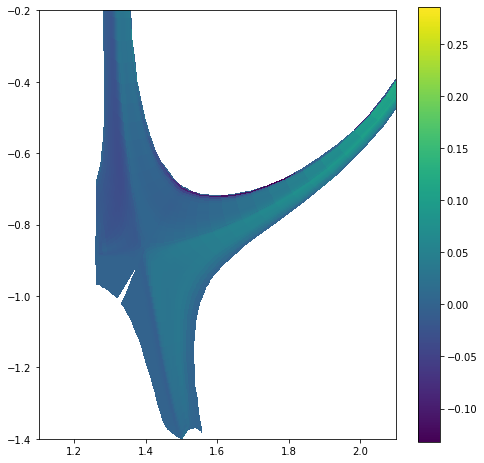

In [11]:

plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

#plt.title("Radiation")
plt.xlim(1.1,2.1)
plt.ylim(-1.4,-0.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
#plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, sum_rad_co_KSTAR_ZeroNe)
#a=fhe_b2fstate_co_KDEMO_3e19Ne[0,:,:]-fhe_b2fstate_al_KDEMO_3e19Ne[0,:,:]
plt.pcolormesh(almesh_x_cen, almesh_y_cen,np.sum(fhi_b2fstate_co_KDEMO_3e19Ne,axis = 0)/1000000)

plt.colorbar()

plt.show()

In [12]:
print(np.sum(abs(rad_al_KDEMO_3e19Ne/1000000)), np.sum(rad_co_KDEMO_3e19Ne/1000000))



1.9127212298176963 1.4511924255608077


In [13]:
print(np.sum(fhe_b2fstate_co_KDEMO_3e19Ne/1000000))
print(np.sum(fhe_b2fstate_al_KDEMO_3e19Ne/1000000))

133.02891212266525
109.42951430663805


In [14]:
print(np.sum(abs(fht_b2fplasmf_co_KDEMO_3e19Ne)/1000000))
print(np.sum(abs(fht_b2fplasmf_al_KDEMO_3e19Ne)/1000000))

491.3511967237453
331.4525918076348


In [15]:
print(np.sum(fht_b2fplasmf_co_KSTAR_3e19Ne/1000000))
print(np.sum(fht_b2fplasmf_al_KSTAR_3e19Ne/1000000))

-18.552899827762108
59.457993596574454


In [16]:
print(sum_rad_co_KSTAR_3e16Ne)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           3.32864132  21.13349395 ...  14.15371381   2.6777895
    0.        ]
 [  0.           4.35052308  25.39212417 ...  17.63083361   3.54787868
    0.        ]
 ...
 [  0.          17.13622753 117.48187965 ... 130.10980997  34.38032458
    0.        ]
 [  0.          11.2115549   89.09502133 ... 211.51806125  53.5451729
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_30844/2798526552.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.log10(na_b2fstate_al_KDEMO_3e16Ne[15,:,:]))


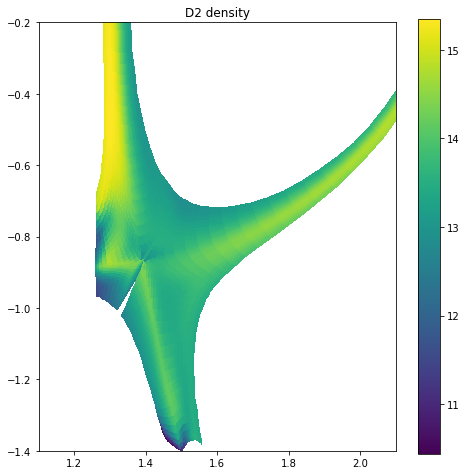

In [97]:
plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("D2 density")
plt.xlim(1.1,2.1)
plt.ylim(-1.4,-0.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
#plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, co_ITER_ion_density_3e19[2,:,:])
plt.pcolormesh(almesh_x_cen, almesh_y_cen, np.log10(na_b2fstate_al_KDEMO_3e16Ne[15,:,:]))


plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_30844/101763041.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen, almesh_y_cen, sum_rad_al_KSTAR_ZeroNe)


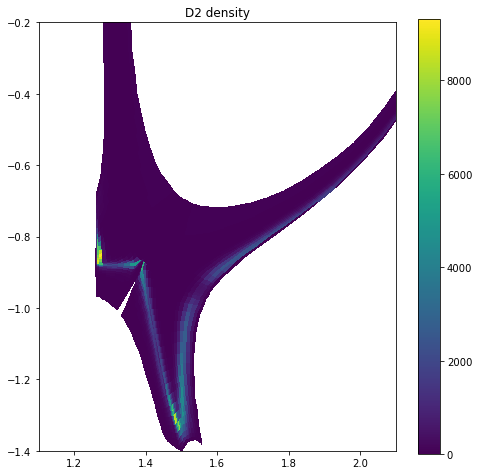

In [100]:
plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("D2 density")
plt.xlim(1.1,2.1)
plt.ylim(-1.4,-0.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
#plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, co_ITER_ion_density_3e19[2,:,:])
plt.pcolormesh(almesh_x_cen, almesh_y_cen, sum_rad_al_KSTAR_ZeroNe)

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_30844/3902788770.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(convmesh_x_cen,convmesh_y_cen, sum_rad_co_KDEMO_3e19Ne)


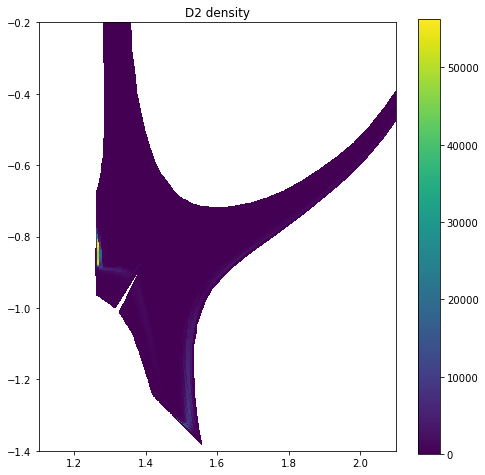

In [108]:
plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("D2 density")
plt.xlim(1.1,2.1)
plt.ylim(-1.4,-0.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
#plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, co_ITER_ion_density_3e19[2,:,:])
plt.pcolormesh(convmesh_x_cen,convmesh_y_cen, sum_rad_co_KDEMO_3e19Ne)

plt.colorbar()

plt.show()

/var/folders/6l/rtqlm1413nv4p09yfmh2nkhc0000gn/T/ipykernel_30844/98059308.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(almesh_x_cen,almesh_y_cen, sum_rad_al_KDEMO_3e19Ne)


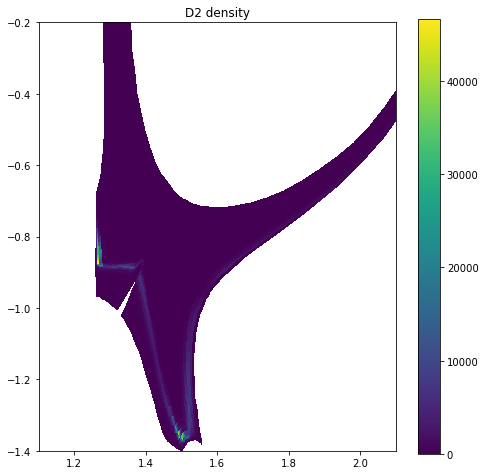

In [107]:
plt.figure(figsize=(8, 8))


plt.axes().set_aspect('equal')

plt.title("D2 density")
plt.xlim(1.1,2.1)
plt.ylim(-1.4,-0.2)
#dataiwant_conv = dataiwant_conv.sum(axis=0)
#plt.pcolormesh(convmesh_x_cen, convmesh_y_cen, co_ITER_ion_density_3e19[2,:,:])
plt.pcolormesh(almesh_x_cen,almesh_y_cen, sum_rad_al_KDEMO_3e19Ne)

plt.colorbar()

plt.show()

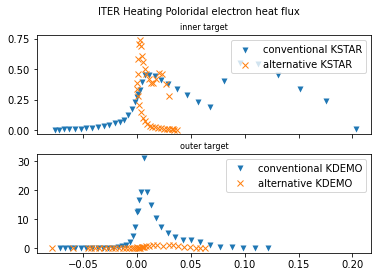

In [23]:
fa, (ax1, ax2) = plt.subplots(2,sharex=True)

plt.suptitle('ITER Heating Poloridal electron heat flux',fontsize=10)

ax1.set_title('inner target', fontsize = 8)
ax1.scatter(conv_sep_in_target_dist[1:] ,abs(fht_b2fplasmf_co_ITER_3e19Ne[0,1:,1])/(co_facing[0,1:,1]*1000000),marker = 'v',linewidth = 0, label = "conventional KSTAR")
ax1.scatter(al_sep_in_target_dist[1:],abs(fht_b2fplasmf_al_ITER_3e19Ne[0,1:,1])/(al_facing[0,1:,1]*1000000),marker = 'x' ,linewidth = 1,label = "alternative KSTAR")
ax1.legend()


ax2.set_title('outer target', fontsize = 8)
ax2.scatter(conv_sep_out_target_dist[1:], abs(fht_b2fplasmf_co_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0, label = "conventional KDEMO")
ax2.scatter(al_sep_out_target_dist[1:], abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x' ,linewidth = 1,label = "alternative KDEMO")
#ax2.scatter(al_sep_out_target_dist[1:], abs(fhe_b2fstate_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x' ,linewidth = 1,label = "KDEMO KSTAR")

ax2.legend()
plt.show()

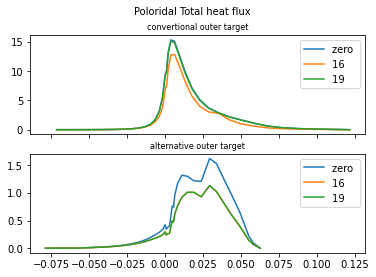

In [24]:
fa, (ax1, ax2) = plt.subplots(2,sharex=True)

plt.suptitle('Poloridal Total heat flux',fontsize=10)

ax1.set_title('convertional outer target', fontsize = 8)
ax1.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "zero ")
ax1.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "16 ")
ax1.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KDEMO_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")
ax1.legend()


ax2.set_title('alternative outer target', fontsize = 8)
ax2.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "zero ")
ax2.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "16 ")
ax2.plot(al_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_al_KDEMO_3e19Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = "19 ")
ax2.legend()
plt.show()

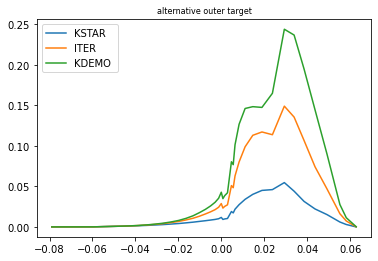

In [61]:
plt.title('alternative outer target', fontsize = 8)
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KSTAR_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "KSTAR ")
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000), label = "ITER ")
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_KDEMO_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = "KDEMO ")
plt.legend()
plt.show()


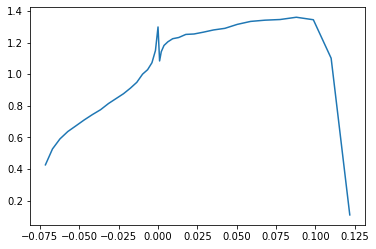

In [93]:
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "KSTAR ")



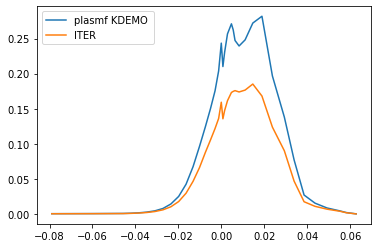

In [76]:
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fplasmf_co_KDEMO_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "plasmf KDEMO ")
plt.plot(al_sep_out_target_dist[1:], np.abs(fhi_b2fplasmf_co_ITER_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000), label = "ITER ")

plt.legend()

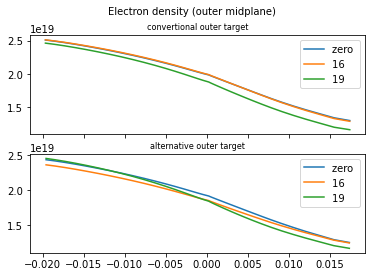

In [26]:
fa, (ax1, ax2) = plt.subplots(2,sharex=True)

plt.suptitle('Electron density (outer midplane)',fontsize=10)

ax1.set_title('convertional outer target', fontsize = 8)
ax1.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_noNe[1:,52]), label = "zero ")
ax1.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_3e16Ne[1:,52]), label = "16 ")
ax1.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_3e19Ne[1:,52]),label = "19 ")
ax1.legend()


ax2.set_title('alternative outer target', fontsize = 8)
ax2.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_noNe[1:,52]), label = "zero ")
ax2.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_3e16Ne[1:,52]), label = "16 ")
ax2.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_3e19Ne[1:,52]),label = "19 ")
ax2.legend()
plt.show()

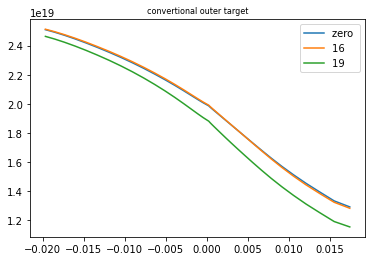

In [27]:
plt.title('convertional outer target', fontsize = 8)
plt.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_noNe[1:,51]), label = "zero ")
plt.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_3e16Ne[1:,51]), label = "16 ")
plt.plot(conv_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_co_KSTAR_3e19Ne[1:,51]),label = "19 ")
plt.legend()



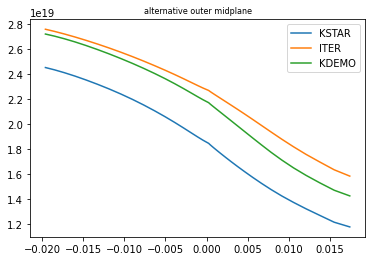

In [28]:
plt.title('alternative outer midplane', fontsize = 8)
#plt.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_noNe[1:,52]), label = "zero ")
plt.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_3e19Ne[1:,52]), label = "KSTAR")
plt.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_ITER_3e19Ne[1:,52]), label = "ITER ")
plt.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KDEMO_3e19Ne[1:,52]),label = "KDEMO")
plt.legend()
plt.show()

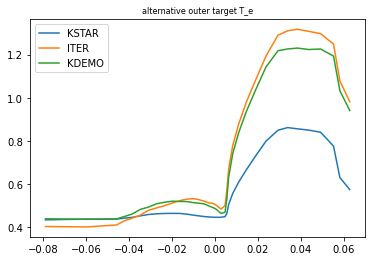

In [29]:
plt.title('alternative outer target T_e', fontsize = 8)
#plt.plot(al_sep_out_midplane_dist[1:], np.abs(ne_b2fstate_al_KSTAR_noNe[1:,52]), label = "zero ")
plt.plot(al_sep_out_target_dist[1:], np.abs(te_b2fstate_al_KSTAR_3e19Ne[1:,96]), label = "KSTAR")
plt.plot(al_sep_out_target_dist[1:], np.abs(te_b2fstate_al_ITER_3e19Ne[1:,96]), label = "ITER ")
plt.plot(al_sep_out_target_dist[1:], np.abs(te_b2fstate_al_KDEMO_3e19Ne[1:,96]),label = "KDEMO")
plt.legend()
plt.show()

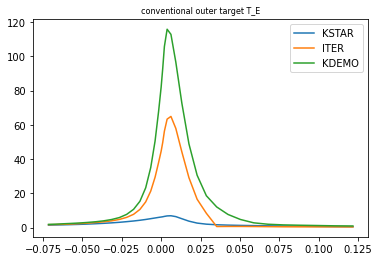

In [30]:
plt.title('conventional outer target T_E', fontsize = 8)
plt.plot(conv_sep_out_target_dist[1:], np.abs(te_b2fstate_co_KSTAR_3e16Ne[1:,96]), label = "KSTAR")
plt.plot(conv_sep_out_target_dist[1:], np.abs(te_b2fstate_co_ITER_3e16Ne[1:,96]), label = "ITER ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(te_b2fstate_co_KDEMO_3e16Ne[1:,96]),label = "KDEMO")
plt.legend()
plt.show()

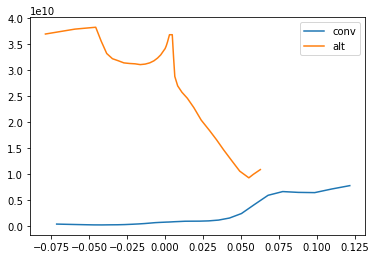

In [31]:
plt.plot(conv_sep_out_target_dist[1:], np.abs(na_b2fstate_co_KDEMO_noNe[0,1:,96]), label = "conv")
plt.plot(al_sep_out_target_dist[1:], np.abs(na_b2fstate_al_KDEMO_noNe[0,1:,96]), label = "alt")
plt.legend()
plt.show()


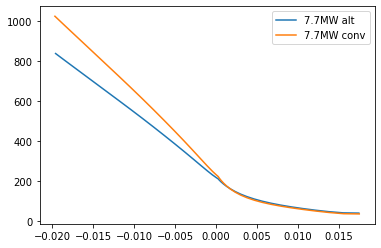

In [32]:
plt.plot(al_sep_out_midplane_dist[1:], np.abs(te_b2fstate_al_KDEMO_3e19Ne[1:,52]),label = "7.7MW alt")
plt.plot(conv_sep_out_midplane_dist[1:], np.abs(te_b2fstate_co_KDEMO_3e19Ne[1:,52]),label = "7.7MW conv")
plt.legend()
plt.show()


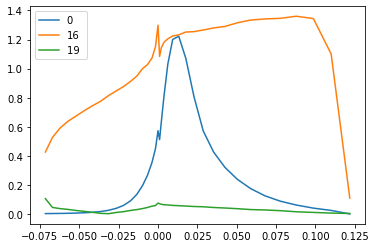

In [33]:
#fa, (ax1, ax2) = plt.subplots(2,sharex=True)


#ax1.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")
#ax1.plot(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),label = "19 ")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_3e16ws3[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")
#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")

#plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_ws3_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")
plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "0 ")

plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_3e16Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "16")

plt.plot(conv_sep_out_target_dist[1:], np.abs(fht_b2fplasmf_co_KSTAR_3e19Ne[0,1:,96])/(co_facing[0,1:,96]*1000000),label = "19 ")

plt.legend()


plt.show()



In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
import os, sys




delete = "rm ./b2fplasmf_trial.txt"

puff = "3e16Ne"

#ws4
fname_list = list()
fpath_list = list()
fname_list.append("b2fplasmf_al_KSTAR_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/altergeo_sput_neon/Baseline_KSTAR/b2fplasmf")
fname_list.append("b2fplasmf_al_ITER_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/altergeo_sput_neon/ITER_Heating/b2fplasmf")
fname_list.append("b2fplasmf_al_KDEMO_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/altergeo_sput_neon/KDEMO_Heating/b2fplasmf")

fname_list.append("b2fplasmf_co_KSTAR_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/Basline_KSTAR/b2fplasmf")
fname_list.append("b2fplasmf_co_ITER_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/ITER_Heating/b2fplasmf")
fname_list.append("b2fplasmf_co_KDEMO_%s" %puff)
fpath_list.append("/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/KDEMO_Heating/b2fplasmf")



In [73]:
print(fpath_list)

['/home/chanyeong/solps-iter/runs/altergeo_sput_neon/Baseline_KSTAR/b2fplasmf', '/home/chanyeong/solps-iter/runs/altergeo_sput_neon/ITER_Heating/b2fplasmf', '/home/chanyeong/solps-iter/runs/altergeo_sput_neon/KDEMO_Heating/b2fplasmf', '/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/Basline_KSTAR/b2fplasmf', '/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/ITER_Heating/b2fplasmf', '/home/chanyeong/solps-iter/runs/conventionalgeo_sput_neon/KDEMO_Heating/b2fplasmf']


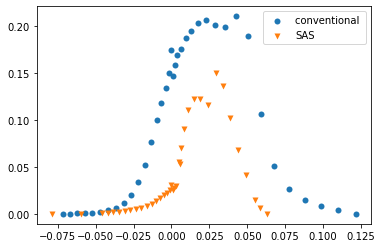

In [34]:
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhi_b2fstate_co_ITER_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0, label = "conventional ")
plt.scatter(al_sep_out_target_dist[1:], np.abs(fhi_b2fstate_al_ITER_noNe[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0, label = "SAS")
plt.legend()
plt.show()

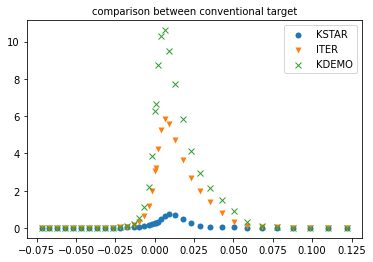

In [35]:
plt.title('comparison between conventional target', fontsize = 10)
condition = 'KSTAR'

plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KSTAR_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0, label = "KSTAR ")
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_ITER_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0, label = "ITER")
plt.scatter(conv_sep_out_target_dist[1:], np.abs(fhe_b2fstate_co_KDEMO_noNe[0,1:,96])/(co_facing[0,1:,96]*1000000),marker = 'x' ,linewidth = 1,label = "KDEMO")
plt.legend()
plt.show()

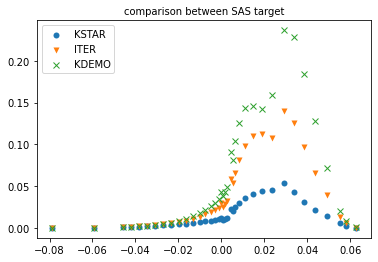

In [36]:
plt.title('comparison between SAS target', fontsize = 10)
condition = 'KSTAR'

plt.scatter(al_sep_out_target_dist[1:], np.abs(fhe_b2fstate_al_KSTAR_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'o',linewidth = 0, label = "KSTAR ")
plt.scatter(al_sep_out_target_dist[1:], np.abs(fhe_b2fstate_al_ITER_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'v',linewidth = 0, label = "ITER")
plt.scatter(al_sep_out_target_dist[1:], np.abs(fhe_b2fstate_al_KDEMO_3e16Ne[0,1:,96])/(al_facing[0,1:,96]*1000000),marker = 'x' ,linewidth = 1,label = "KDEMO")
plt.legend()
plt.show()

IndexError: index 96 is out of bounds for axis 1 with size 38

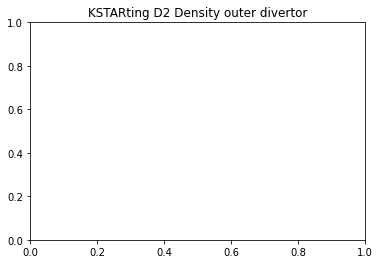

In [37]:
plt.title("KSTARting D2 Density outer divertor")

plt.scatter(al_sep_out_target_dist ,fhe_b2fstate_al_KSTAR_3e16Ne[:,96],linewidth = 0, label = "16 ")
plt.scatter(al_sep_out_target_dist,fhe_b2fstate_al_KSTAR_3e18Ne[:,96],marker = 'v' ,linewidth = 1,label = "18 ")
plt.scatter(al_sep_out_target_dist,fhe_b2fstate_al_KSTAR_3e19Ne[:,96],marker = 'x' ,linewidth = 1,label = "19 ")


plt.legend()
plt.show()

In [ ]:
plt.title("ITER D2 Density outer divertor")

plt.scatter(al_sep_out_target_dist ,na_b2fstate_al_ITER_3e16Ne[1,:,96],linewidth = 0, label = "16 ")
plt.scatter(al_sep_out_target_dist,na_b2fstate_al_ITER_3e18Ne[1,:,96],marker = 'v' ,linewidth = 1,label = "18 ")
plt.scatter(al_sep_out_target_dist,na_b2fstate_al_ITER_3e19Ne[1,:,96],marker = 'x' ,linewidth = 1,label = "19 ")


plt.legend()
plt.show()

In [ ]:
plt.title("KDEMO D2 Density inner divertor")

plt.scatter(al_sep_out_target_dist ,na_b2fstate_al_KDEMO_3e16Ne[1,:,96],linewidth = 0, label = "16 ")
plt.scatter(al_sep_out_target_dist,na_b2fstate_al_KDEMO_3e18Ne[1,:,96],marker = 'v' ,linewidth = 1,label = "18 ")
plt.scatter(al_sep_out_target_dist,na_b2fstate_al_KDEMO_3e19Ne[1,:,96],marker = 'x' ,linewidth = 1,label = "19 ")


plt.legend()
plt.show()